# Description du Notebook
Visualisation des données : Scatter plots

Sommaire
============
- [Import des données et des packages](#import)
- [Intervalles Âge](#interval-age)
- [Scatter plots](#scatter)
- [Interprétation des résultats](#scatter-interpret)



<a id="import"></a>

## Import des données et des packages

In [6]:
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

start = timeit.default_timer()

# Load data
# LOX-PC : 
data = pd.read_csv('mean_std.csv', dtype={'Taille' : float, 'Appli_origine' : str, 'mean' : float, 'std' : float, 'sem' : float}, na_values = '')


<a id="interval-age"></a>

## Intervalles Âge

In [7]:
# Taille : m -> cm
data["Taille"] = data["Taille"] *100

# //// Intervalles Age
age20 = list(range(20 *365)) # Croissance ~ de 0 à 20 ans
age20_40 = list(range((20 *365), (40 *365))) # Stagnation de 0 à 40 ans 
age40_70 = list(range((40 *365), (70 *365))) # Diminution taille à partir de 40 ans
age70plus = list(range((70 *365) , (110 *365)))

# //// Separation en groupe selon les intervalles d'age
data20 = data[data['age_at_entry'].isin(age20)]
data20.to_csv("data20.csv", index=False)
data20_40 = data[data['age_at_entry'].isin(age20_40)]
data40_70 = data[data['age_at_entry'].isin(age40_70)]
data70 = data[data['age_at_entry'].isin(age70plus)]

<a id="scatter"></a>

## Scatter plots


						  Premier scatter plot


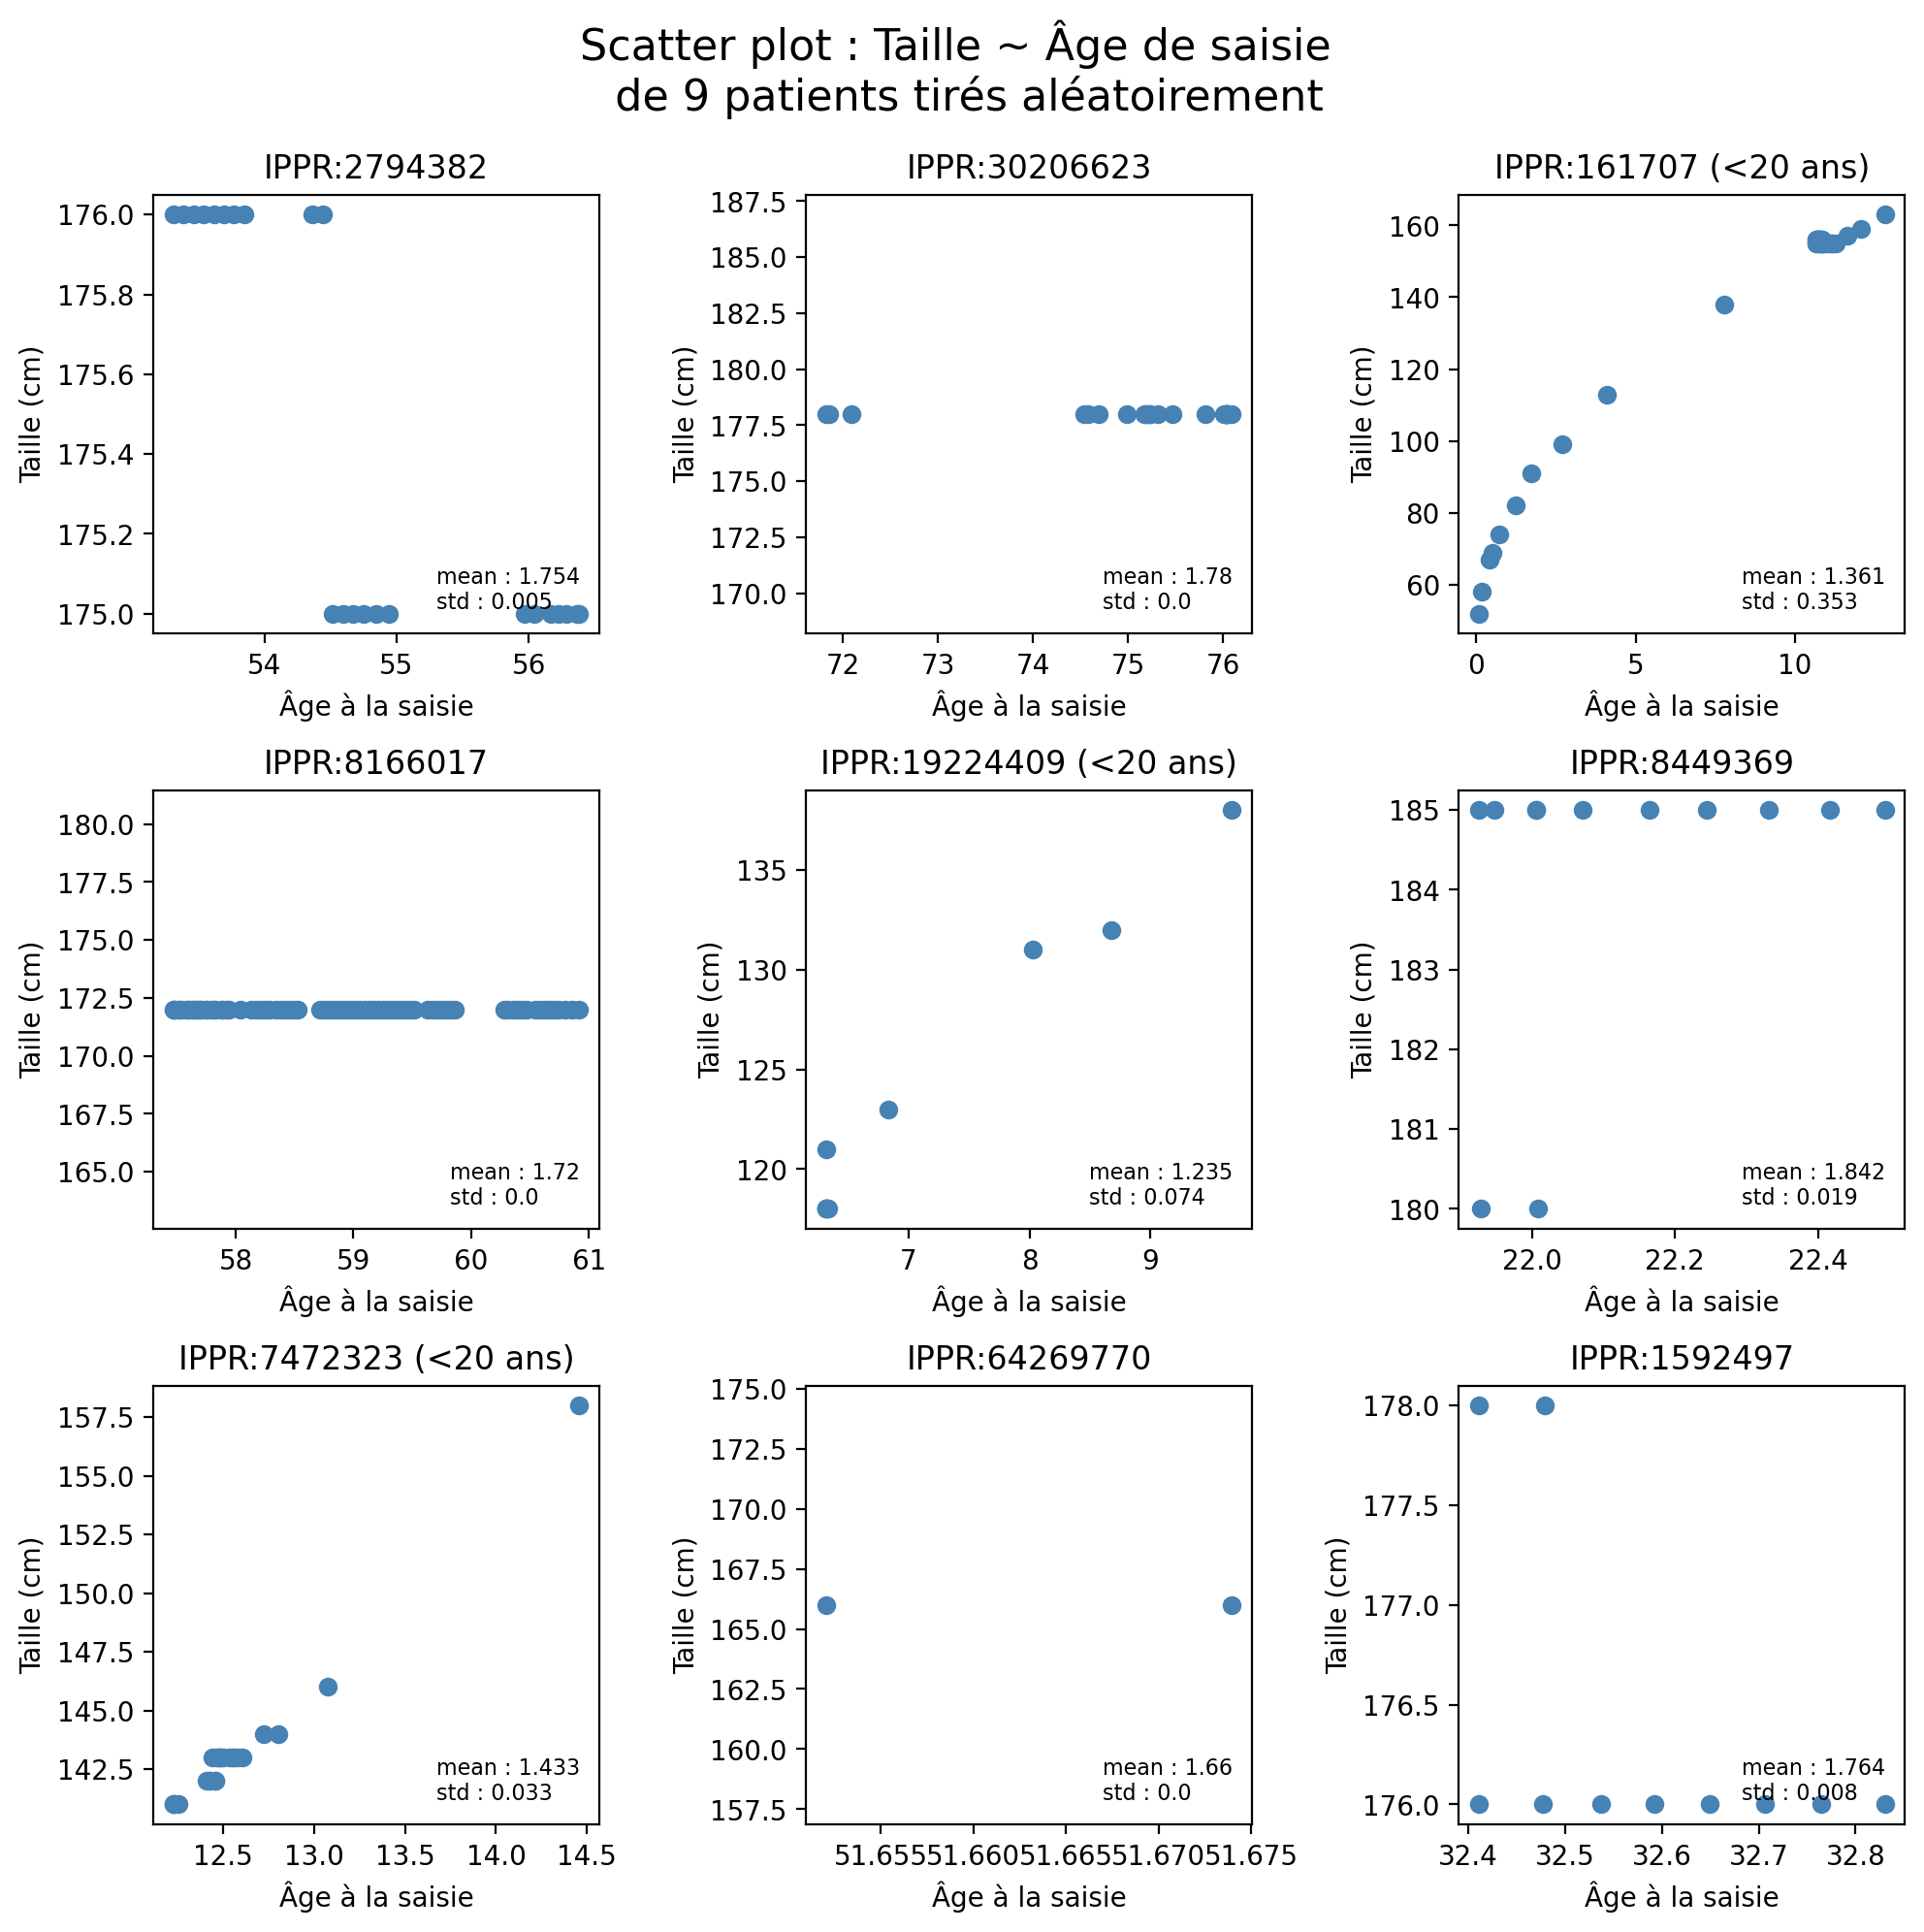


						  Second scatter plot


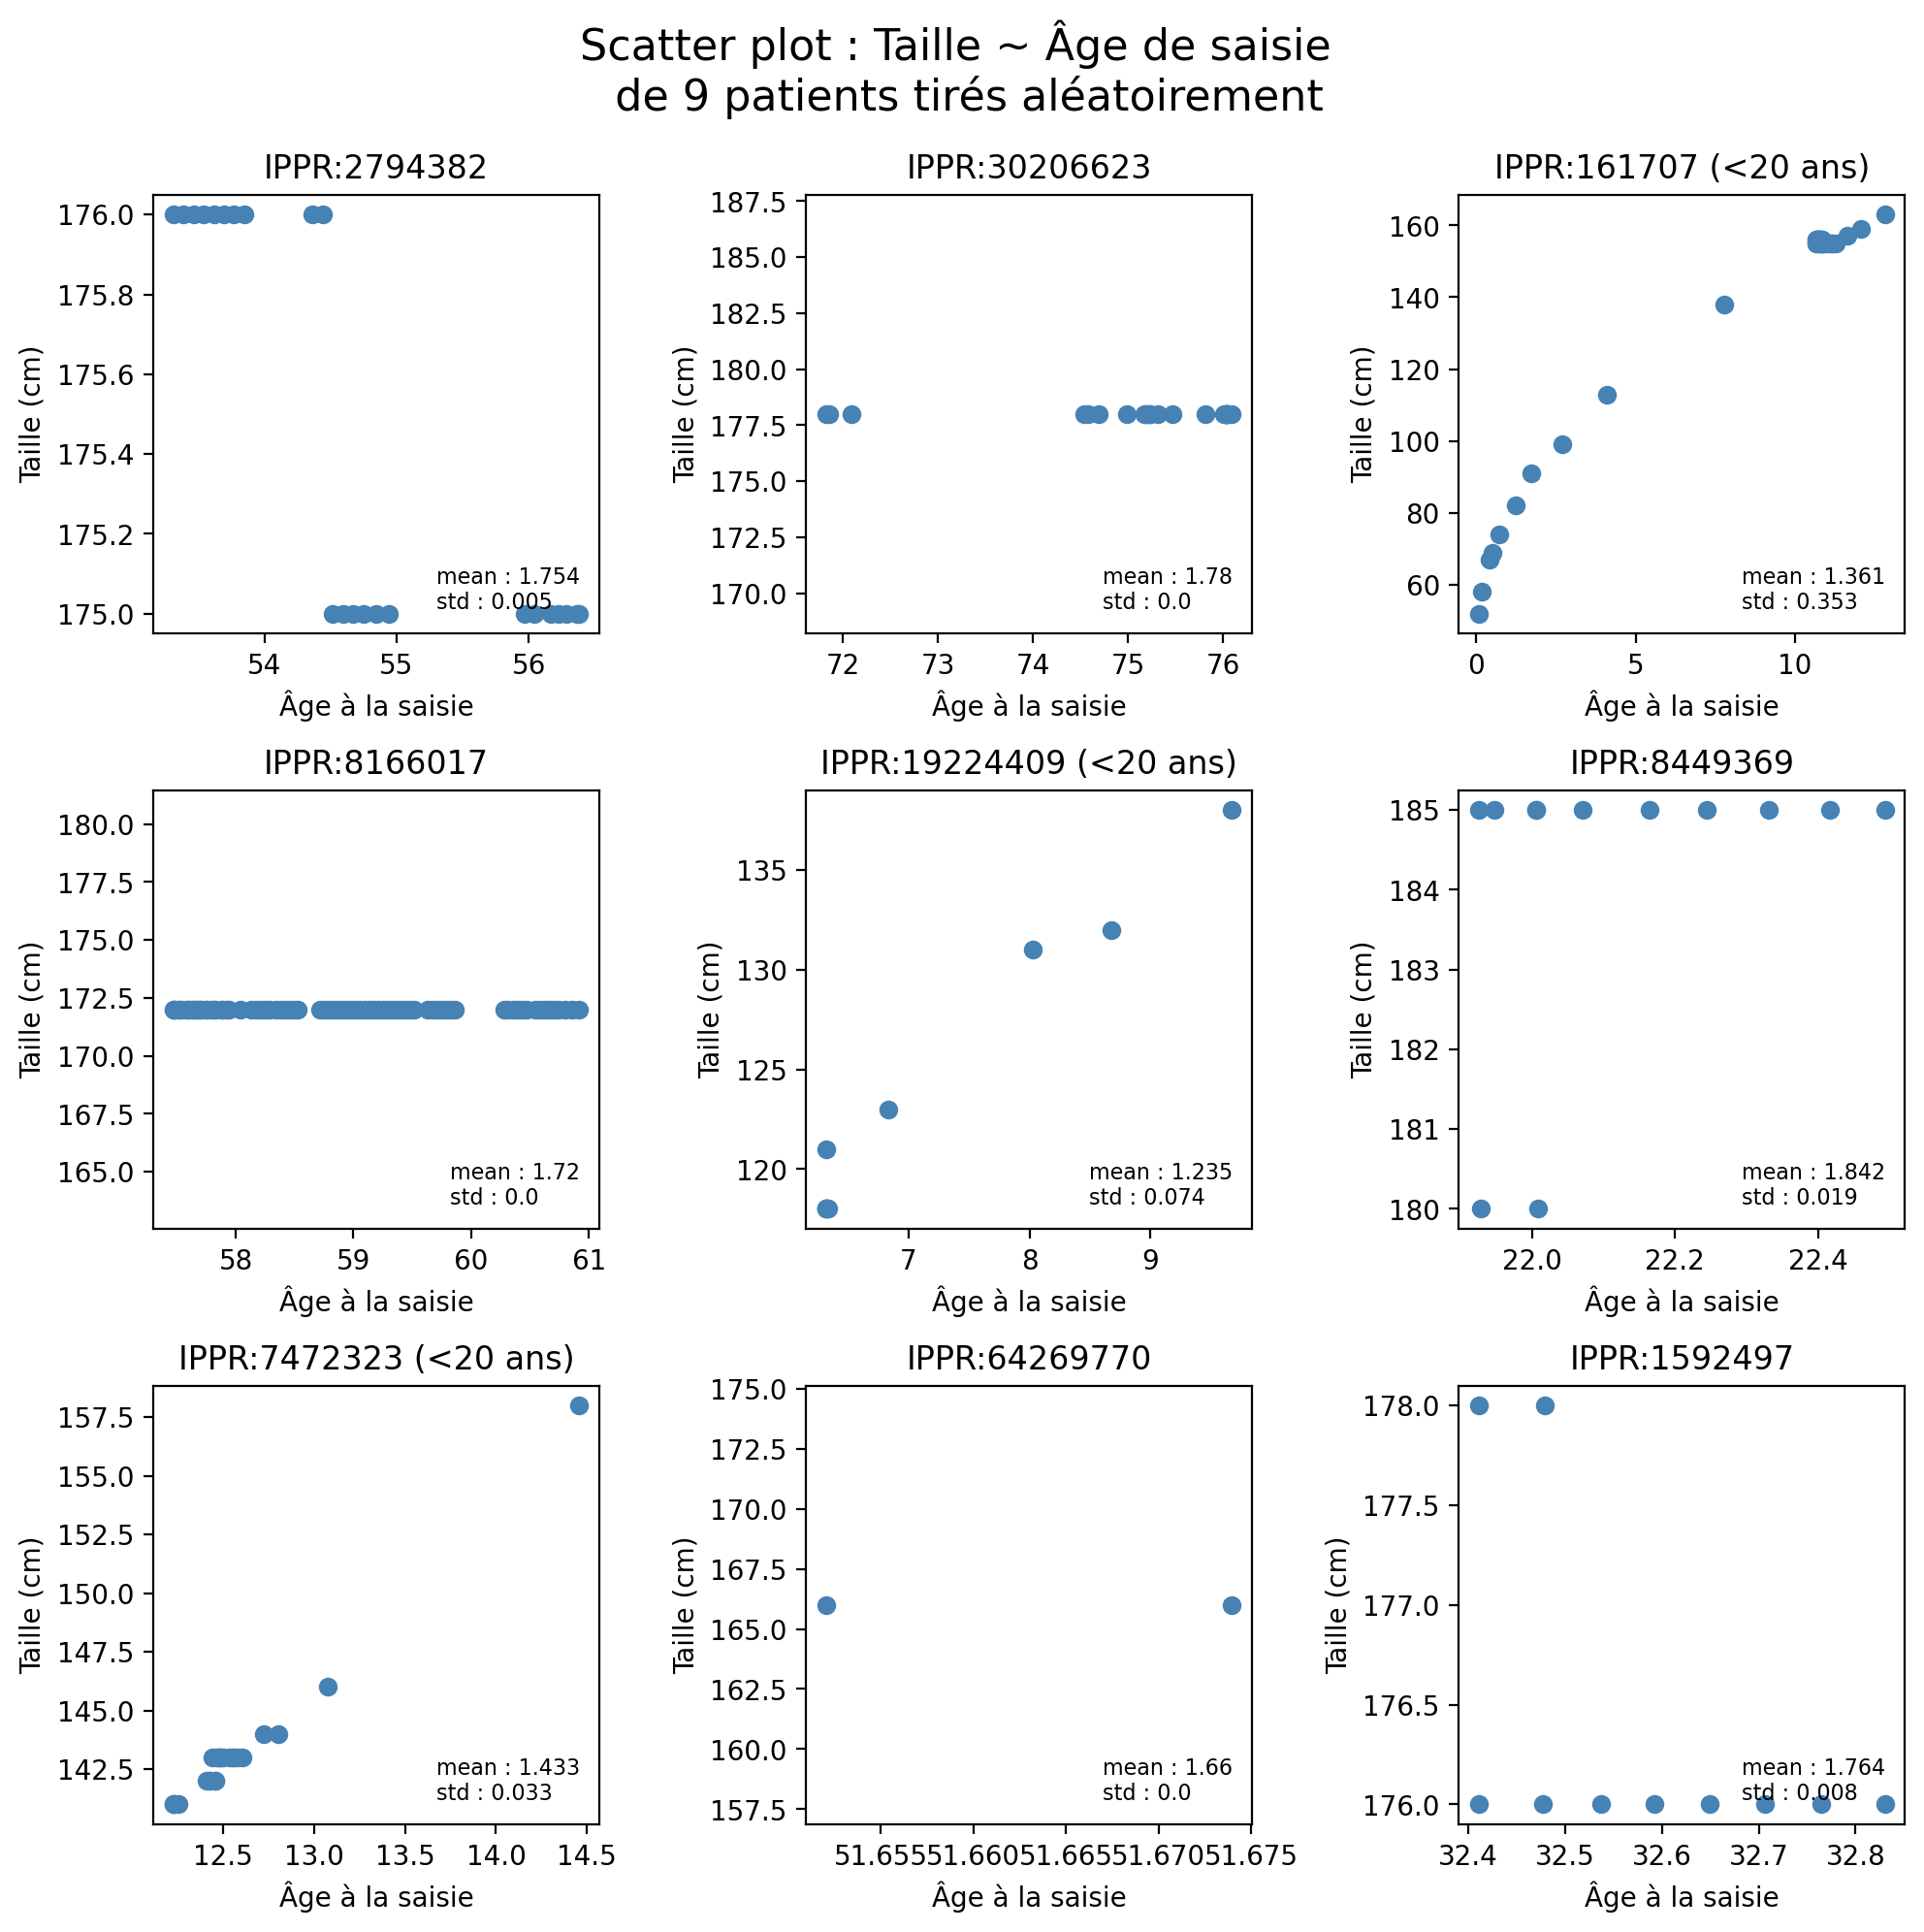


						  Troisième scatter plot


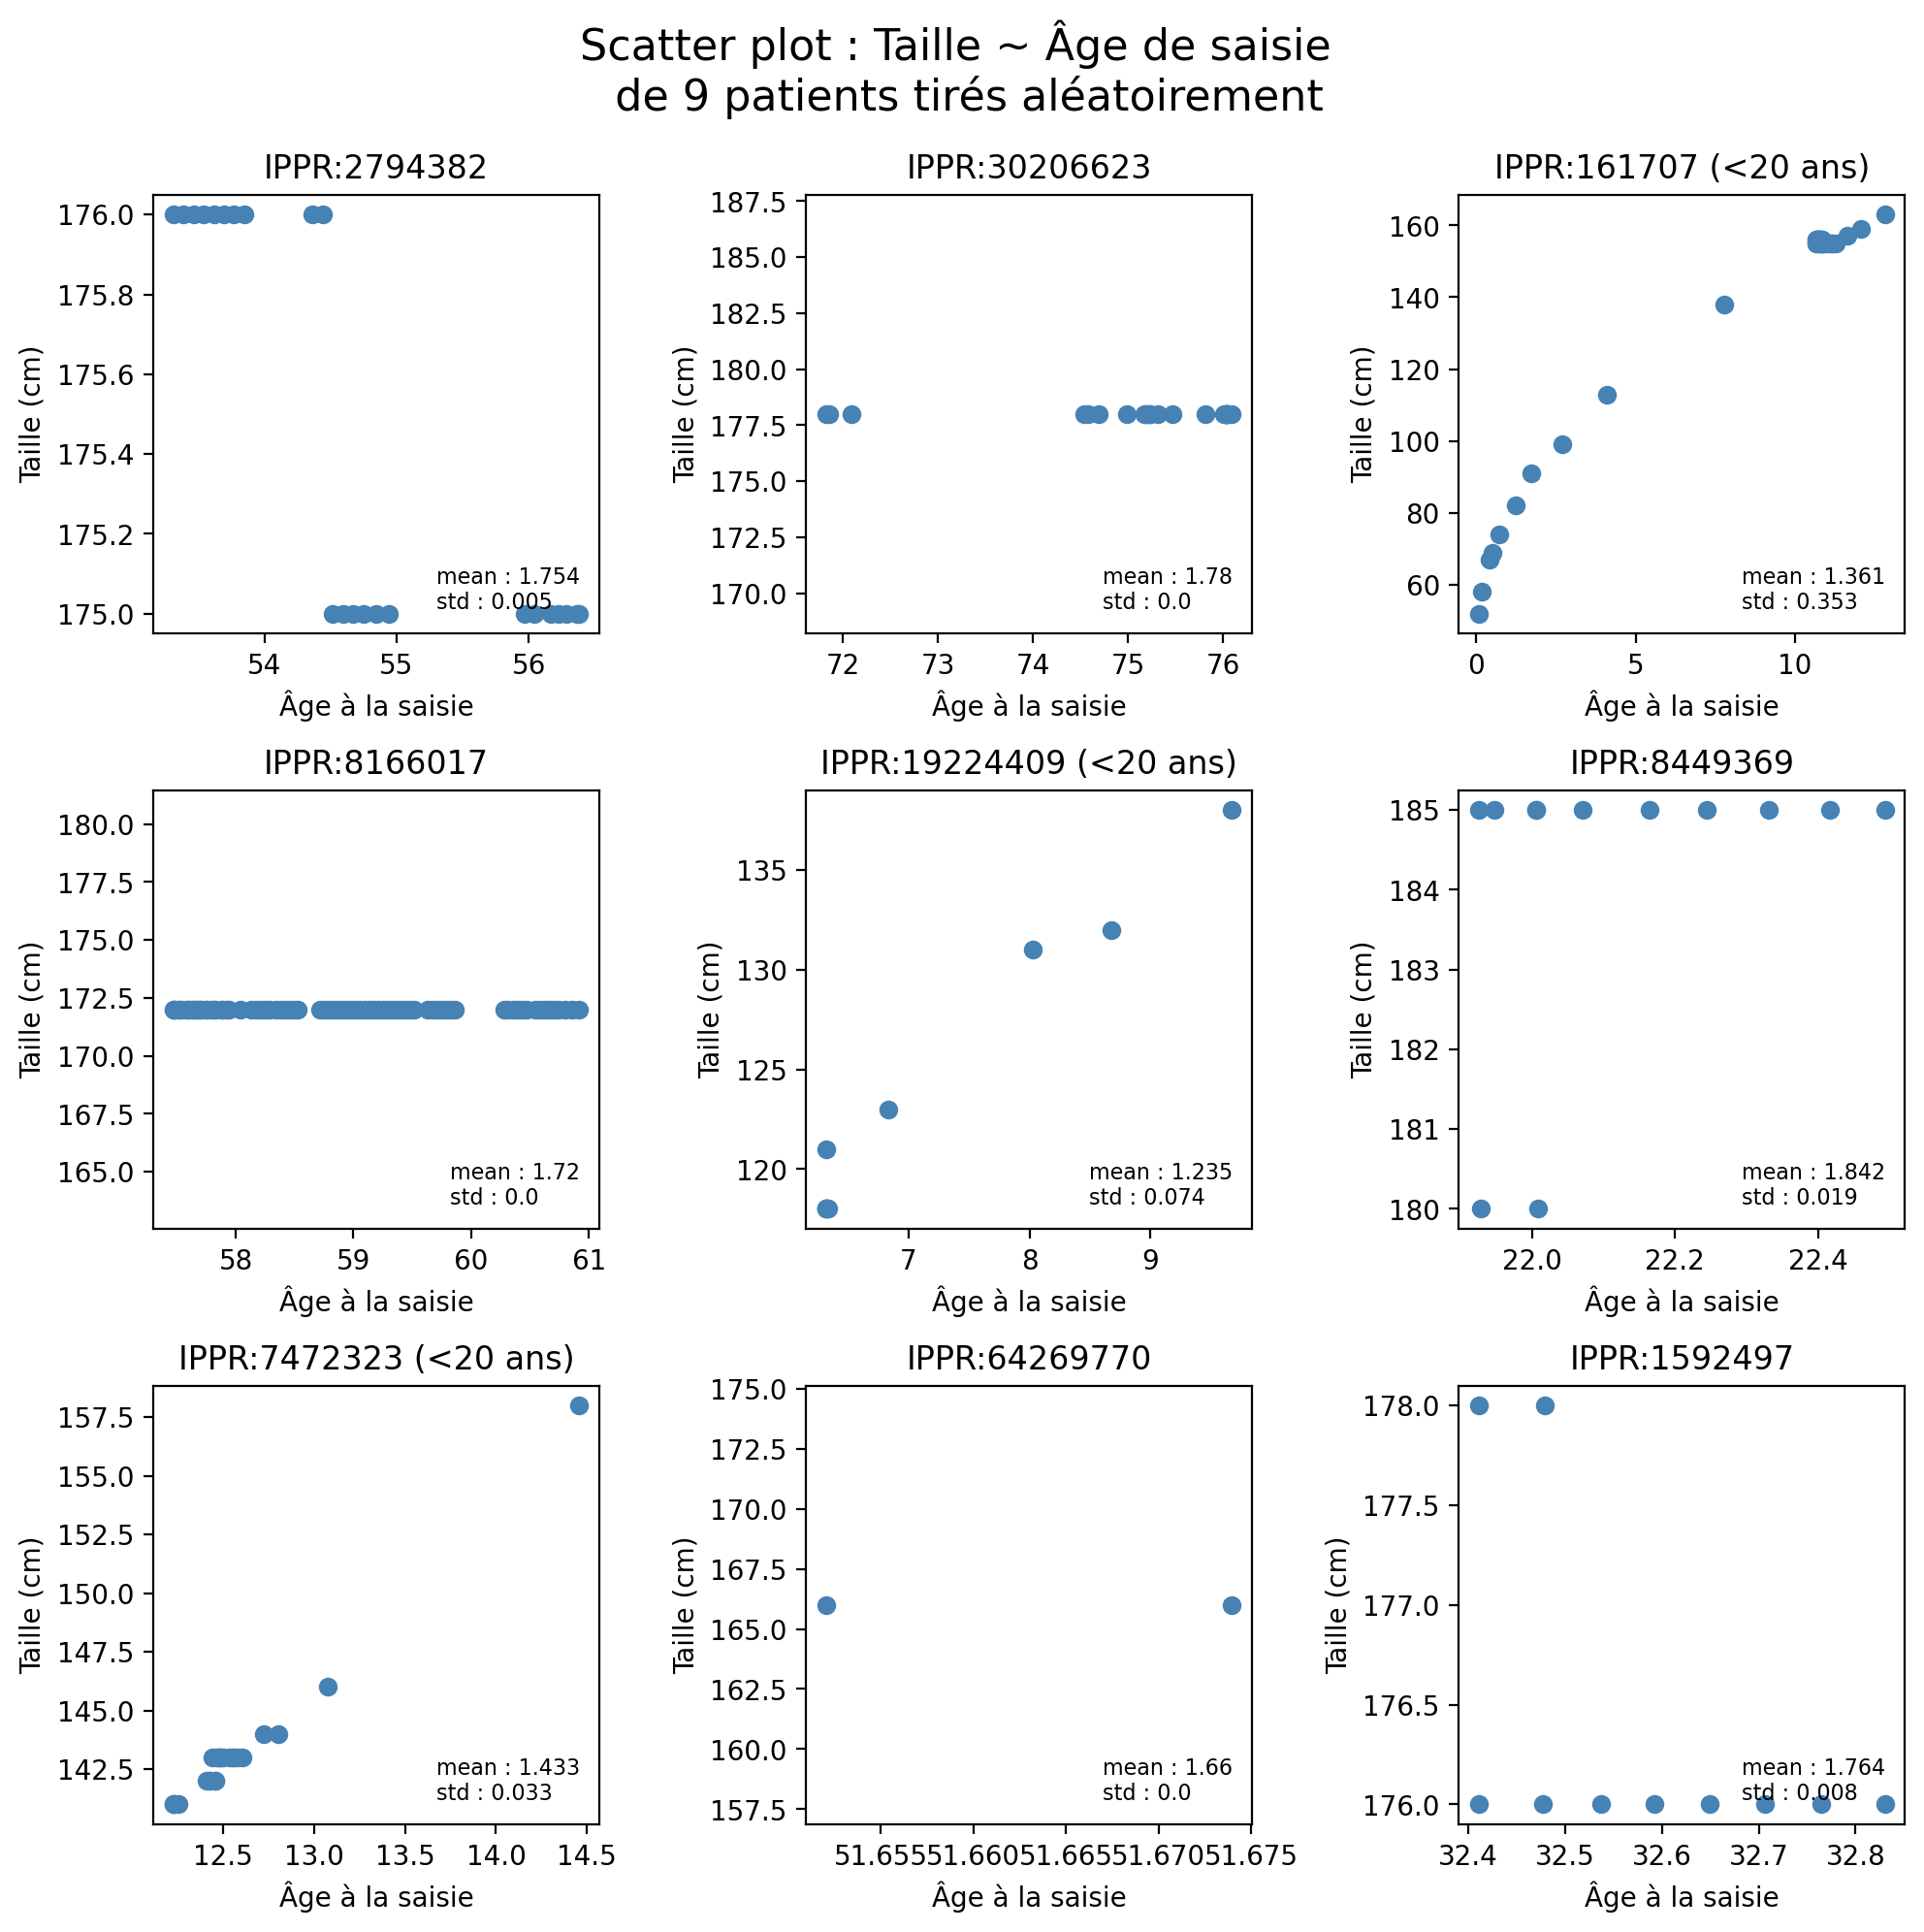

In [16]:
# //// Scatter plots 3x3 de 9 patients choisis aléatoirements
sample_ippr = data['IPPR'].sample(n=9)
sample_ippr = np.array(sample_ippr)
data_sample = data[data["IPPR"].isin(sample_ippr)]

def scatter_3by3(df):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[10, 10], dpi=200)
    for i, axi in enumerate(ax.flat):
        ippri = sample_ippr[i]
        datai = df[df['IPPR'] == ippri]
        xi = datai['age_at_entry'] / 365
        yi = datai['Taille']
        axi.scatter(xi, yi, c='steelblue')
        if (ippri in data20['IPPR'].values):
            axi.set_title("IPPR:"+ str(ippri) + " (<20 ans)")
            axi.set_ylabel("Taille (cm)")
            axi.set_xlabel("Âge à la saisie")
        else:
            axi.set_title("IPPR:"+ str(ippri))
            axi.set_ylabel("Taille (cm)")
            axi.set_xlabel("Âge à la saisie")
        meani = datai['mean'].unique()
        stdi = datai['std'].unique()
        m_s_lbl = "mean : " + str(round(meani[0],3)) + "\nstd : " + str(round(stdi[0],3))
        at = AnchoredText(m_s_lbl,
                  prop=dict(size=8), frameon=False,
                  loc='lower right',
                  )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        axi.add_artist(at)
        
    plt.suptitle("Scatter plot : Taille ~ Âge de saisie \n de 9 patients tirés aléatoirement", y=0.99, size=16)
    plt.tight_layout(pad=1)
    plt.show()

print("\n\t\t\t\t\t\t  Premier scatter plot")
scatter_3by3(data_sample)
print("\n\t\t\t\t\t\t  Second scatter plot")
scatter_3by3(data_sample)
print("\n\t\t\t\t\t\t  Troisième scatter plot")
scatter_3by3(data_sample)

<a id="scatter-interpret"></a>

## Interprétation des résultats

In [ ]:
stop = timeit.default_timer()
print()
print('Time:  ', str(round(stop - start, 4)), 's\n\t' + str(round((stop - start) / 60, 4)) + ' m ')